<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_07_18_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fitter

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [3]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [4]:
pd.read_csv(total_file_link[2])

r/R  mean_delta_x  std_delta_x  mean_delta_y  std_delta_y  \
0   0.2001        0.0434       0.0026       -0.0126       0.0013   
1   0.2499       -0.0157       0.0019       -0.0235       0.0031   
2   0.2998       -0.0418       0.0016       -0.0514       0.0053   
3   0.3498       -0.0550       0.0016       -0.0961       0.0091   
4   0.3913       -0.0646       0.0024       -0.1332       0.0133   
5   0.4496       -0.1020       0.0026       -0.1704       0.0173   
6   0.4997       -0.1255       0.0030       -0.2004       0.0207   
7   0.5387       -0.1535       0.0028       -0.2193       0.0230   
8   0.5996       -0.1964       0.0031       -0.2466       0.0273   
9   0.6498       -0.2235       0.0031       -0.2726       0.0316   
10  0.6998       -0.2741       0.0030       -0.2945       0.0354   
11  0.7500       -0.3002       0.0029       -0.3091       0.0391   
12  0.8001       -0.3363       0.0029       -0.3486       0.0430   
13  0.8497       -0.3810       0.0031       -0.3719       0.0474   
14  0.9102       -0.4236       0.0032       -0.3486       0.0526   
15  0.9734       -0.3914       0.0037       -0.3834       0.0581   

    mean_delta_z  std_delta_z  
0        -0.0162       0.0040  
1        -0.0061       0.0079  
2        -0.0781       0.0130  
3        -0.1268       0.0216  
4        -0.1839       0.0303  
5        -0.3251       0.0405  
6        -0.4803       0.0503  
7        -0.6758       0.0569  
8        -0.9893       0.0678  
9        -1.3829       0.0783  
10       -1.7870       0.0876  
11       -2.2590       0.0965  
12       -2.7745       0.1069  
13       -3.3516       0.1185  
14       -4.1247       0.1339  
15       -4.8769       0.1475

In [5]:
total_alpha_content = [ i / 1000 for i in range( 1 , 10 )  ]
total_flat_content  = [ i for i in range(1 , 5  ) ]
total_location      = list(range( 5 , 16))

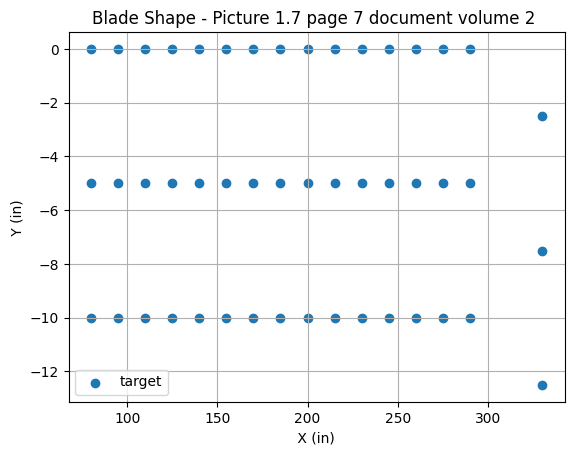

In [6]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [7]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


iter_alpha : 0.001 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.986501582747813
r2_score in Simulation Failt  void  for Each Blade :  0.9788666501772972
Error in Simulation Fault for Each Blade :  0.743540139225483  --- r2_score Fault S ----  0.9893644589083939
Error in Simulation Fault T  for Each Blade :  0.743540139225483  --- r2_score Fault T :  0.9835315712675898
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.988948692492452
r2_score in Simulation Failt  void  for Each Blade :  0.9759215282366043
Error in Simulation Fault for Each Blade :  -0.5322396207956066  --- r2_score Fault S ----  0.9780090671432501
Error in Simulation Fault T  for Each Blade :  -0.5322396207956066  --- r2_score Fault T :  0.983918892853679
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9772322150327045
r2_score in Simulation Failt  void  for Each Blade :  0.9710997355761368
Error in Simulation Fault for

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

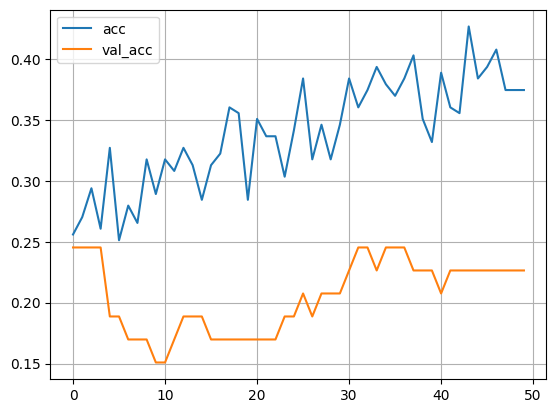

2/2 [==============================] - 0s 5ms/step - loss: 1.5099 - acc: 0.2264
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9865835847051216
r2_score in Simulation Failt  void  for Each Blade :  0.9915907727685837
Error in Simulation Fault for Each Blade :  1.278768955665499  --- r2_score Fault S ----  0.9780011455663828
Error in Simulation Fault T  for Each Blade :  1.278768955665499  --- r2_score Fault T :  0.9914441114025954
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9921551959681248
r2_score in Simulation Failt  void  for Each Blade :  0.9859977286377842
Error in Simulation Fault for Each Blade :  -0.33458221514266384  --- r2_score Fault S ----  0.9841608685752504
Error in Simulation Fault T  for Each Blade :  -0.33458221514266384  --- r2_score Fault T :  0.9677003343157558
 ----- for each Blade Simulate

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.24528301886792453
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

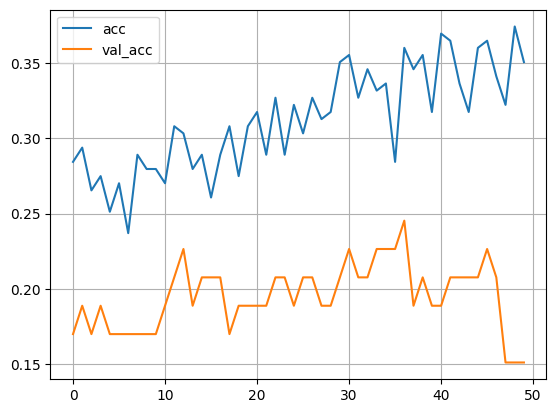

2/2 [==============================] - 0s 5ms/step - loss: 1.4246 - acc: 0.1509
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9717934626185715
r2_score in Simulation Failt  void  for Each Blade :  0.9871344706840924
Error in Simulation Fault for Each Blade :  -0.07644292888089055  --- r2_score Fault S ----  0.9930097909344868
Error in Simulation Fault T  for Each Blade :  -0.07644292888089055  --- r2_score Fault T :  0.9800551747837672
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9674407481590865
r2_score in Simulation Failt  void  for Each Blade :  0.9852363274246999
Error in Simulation Fault for Each Blade :  -0.3851023520093464  --- r2_score Fault S ----  0.9875981291564236
Error in Simulation Fault T  for Each Blade :  -0.3851023520093464  --- r2_score Fault T :  0.9886952853584434
 ----- for each Blade Simu

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

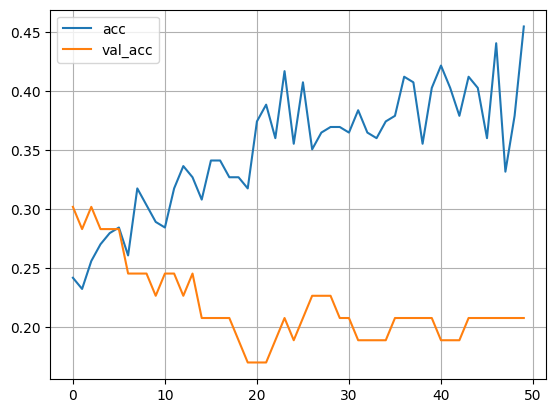

2/2 [==============================] - 0s 4ms/step - loss: 1.4347 - acc: 0.2075
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9823565770870383
r2_score in Simulation Failt  void  for Each Blade :  0.9753397644140241
Error in Simulation Fault for Each Blade :  1.2747720588351852  --- r2_score Fault S ----  0.9594345810342662
Error in Simulation Fault T  for Each Blade :  1.2747720588351852  --- r2_score Fault T :  0.9828221771214377
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9816632534439942
r2_score in Simulation Failt  void  for Each Blade :  0.972177394909456
Error in Simulation Fault for Each Blade :  -0.5566043573632373  --- r2_score Fault S ----  0.9787683124505229
Error in Simulation Fault T  for Each Blade :  -0.5566043573632373  --- r2_score Fault T :  0.9715013221220302
 ----- for each Blade Simulated

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2641509433962264
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

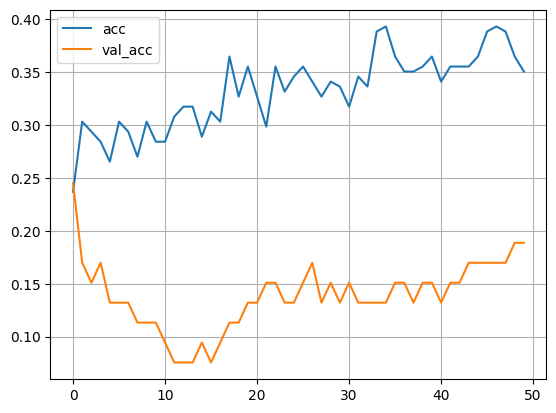

2/2 [==============================] - 0s 3ms/step - loss: 1.4177 - acc: 0.1887
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9879120866084898
r2_score in Simulation Failt  void  for Each Blade :  0.9848495074676404
Error in Simulation Fault for Each Blade :  -0.5901241569671876  --- r2_score Fault S ----  0.9823573978887815
Error in Simulation Fault T  for Each Blade :  -0.5901241569671876  --- r2_score Fault T :  0.9763738326910846
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9588389353576242
r2_score in Simulation Failt  void  for Each Blade :  0.9916433751601065
Error in Simulation Fault for Each Blade :  0.6986134539766207  --- r2_score Fault S ----  0.9598057278457686
Error in Simulation Fault T  for Each Blade :  0.6986134539766207  --- r2_score Fault T :  0.9759474702445434
 ----- for each Blade Simulate

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

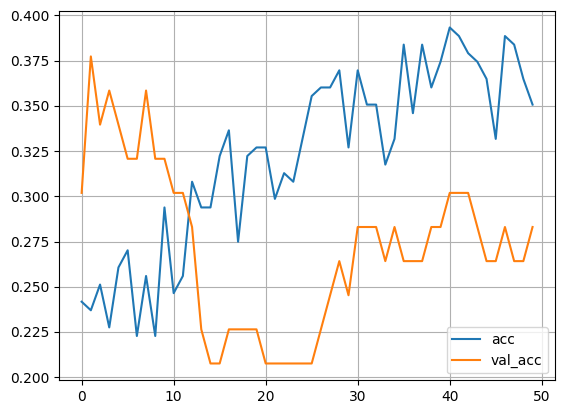

2/2 [==============================] - 0s 4ms/step - loss: 1.4408 - acc: 0.2830
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9673026446698447
r2_score in Simulation Failt  void  for Each Blade :  0.9896681803086459
Error in Simulation Fault for Each Blade :  -0.4473841847646254  --- r2_score Fault S ----  0.9731513650219455
Error in Simulation Fault T  for Each Blade :  -0.4473841847646254  --- r2_score Fault T :  0.9763266261848222
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9534532227360059
r2_score in Simulation Failt  void  for Each Blade :  0.9752574149627532
Error in Simulation Fault for Each Blade :  -0.5868011955049113  --- r2_score Fault S ----  0.9881585391273442
Error in Simulation Fault T  for Each Blade :  -0.5868011955049113  --- r2_score Fault T :  0.9760098137413958
 ----- for each Blade Simula

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

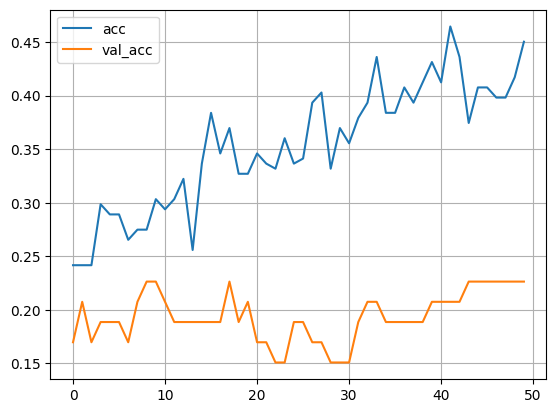

2/2 [==============================] - 0s 4ms/step - loss: 1.5491 - acc: 0.2264
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9892023921457701
r2_score in Simulation Failt  void  for Each Blade :  0.977605570660397
Error in Simulation Fault for Each Blade :  -0.5053179851695693  --- r2_score Fault S ----  0.9846107915898474
Error in Simulation Fault T  for Each Blade :  -0.5053179851695693  --- r2_score Fault T :  0.9746181469602658
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.986601333647549
r2_score in Simulation Failt  void  for Each Blade :  0.9661017295260015
Error in Simulation Fault for Each Blade :  0.6226109386415744  --- r2_score Fault S ----  0.9814776618183594
Error in Simulation Fault T  for Each Blade :  0.6226109386415744  --- r2_score Fault T :  0.9827744155280039
 ----- for each Blade Simulated 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

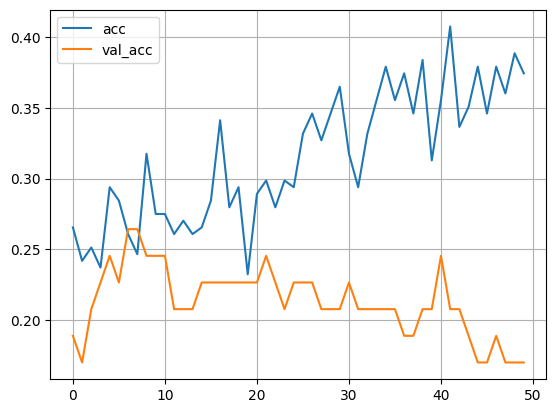

2/2 [==============================] - 0s 4ms/step - loss: 1.4399 - acc: 0.1698
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9886816630026729
r2_score in Simulation Failt  void  for Each Blade :  0.9866551217613622
Error in Simulation Fault for Each Blade :  -1.1037107613925297  --- r2_score Fault S ----  0.9922543474663013
Error in Simulation Fault T  for Each Blade :  -1.1037107613925297  --- r2_score Fault T :  0.990933899314726
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9857660937843439
r2_score in Simulation Failt  void  for Each Blade :  0.9785944886157697
Error in Simulation Fault for Each Blade :  -1.187281098497626  --- r2_score Fault S ----  0.976372508799506
Error in Simulation Fault T  for Each Blade :  -1.187281098497626  --- r2_score Fault T :  0.9903714737432675
 ----- for each Blade Simulated 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.16981132075471697
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

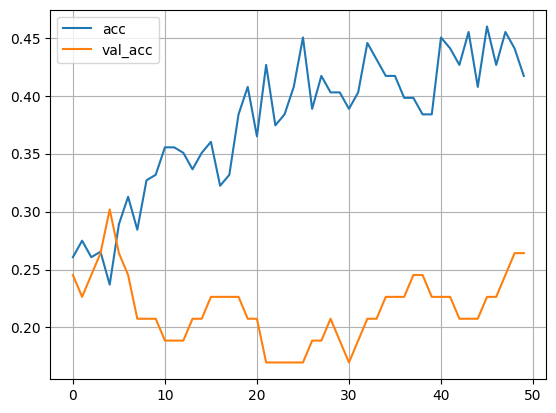

2/2 [==============================] - 0s 4ms/step - loss: 1.4755 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9900193076604212
r2_score in Simulation Failt  void  for Each Blade :  0.9918801656914894
Error in Simulation Fault for Each Blade :  1.4082108770147128  --- r2_score Fault S ----  0.9819133502354136
Error in Simulation Fault T  for Each Blade :  1.4082108770147128  --- r2_score Fault T :  0.9562122673602674
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9911168957181735
r2_score in Simulation Failt  void  for Each Blade :  0.9844368161022042
Error in Simulation Fault for Each Blade :  -0.42009234725222044  --- r2_score Fault S ----  0.98999032793434
Error in Simulation Fault T  for Each Blade :  -0.42009234725222044  --- r2_score Fault T :  0.977606569403425
 ----- for each Blade Simulated

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.18867924528301888
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

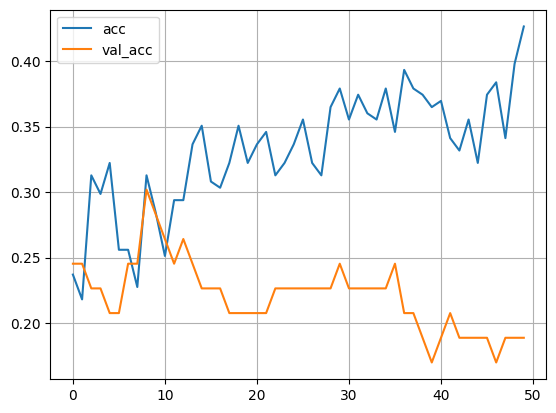

2/2 [==============================] - 0s 4ms/step - loss: 1.4448 - acc: 0.1887
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9830391165538477
r2_score in Simulation Failt  void  for Each Blade :  0.9902984336491882
Error in Simulation Fault for Each Blade :  0.26718077391764705  --- r2_score Fault S ----  0.9830255011598156
Error in Simulation Fault T  for Each Blade :  0.26718077391764705  --- r2_score Fault T :  0.9682578255584705
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9942339839434708
r2_score in Simulation Failt  void  for Each Blade :  0.9874477655398496
Error in Simulation Fault for Each Blade :  -0.7763660960505616  --- r2_score Fault S ----  0.9657841904813126
Error in Simulation Fault T  for Each Blade :  -0.7763660960505616  --- r2_score Fault T :  0.953384495020095
 ----- for each Blade Simulat

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.1509433962264151
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

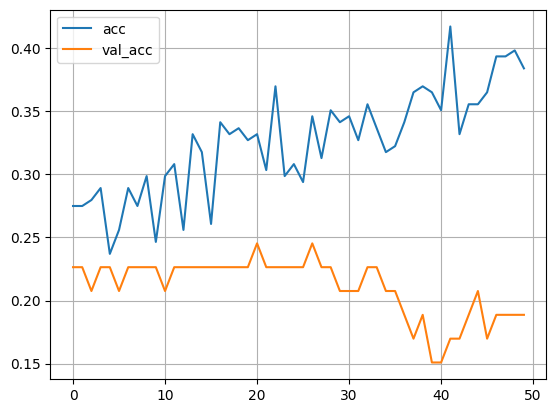

2/2 [==============================] - 0s 4ms/step - loss: 1.4550 - acc: 0.1887
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9928341048798727
r2_score in Simulation Failt  void  for Each Blade :  0.9951957279123604
Error in Simulation Fault for Each Blade :  -0.10456609014536267  --- r2_score Fault S ----  0.9924673927948092
Error in Simulation Fault T  for Each Blade :  -0.10456609014536267  --- r2_score Fault T :  0.9838651116678224
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9734536676186346
r2_score in Simulation Failt  void  for Each Blade :  0.9751158997147569
Error in Simulation Fault for Each Blade :  -1.0943597051650498  --- r2_score Fault S ----  0.9816966859954405
Error in Simulation Fault T  for Each Blade :  -1.0943597051650498  --- r2_score Fault T :  0.9765953046072567
 ----- for each Blade Simu

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

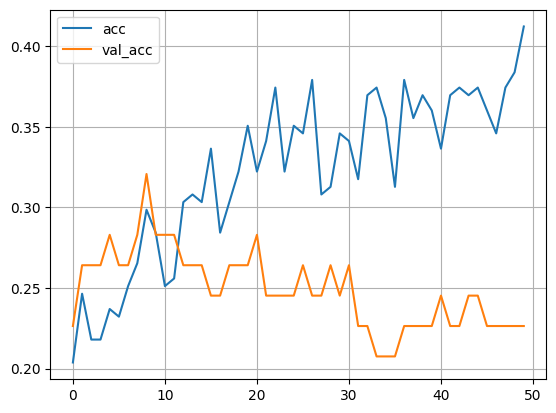

2/2 [==============================] - 0s 5ms/step - loss: 1.4121 - acc: 0.2264
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9825468630027352
r2_score in Simulation Failt  void  for Each Blade :  0.9849848420256174
Error in Simulation Fault for Each Blade :  -1.9650968431973173  --- r2_score Fault S ----  0.9742126762572175
Error in Simulation Fault T  for Each Blade :  -1.9650968431973173  --- r2_score Fault T :  0.9694468042671968
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.926735996780886
r2_score in Simulation Failt  void  for Each Blade :  0.9714252568494823
Error in Simulation Fault for Each Blade :  0.5933470165531243  --- r2_score Fault S ----  0.9855059457991902
Error in Simulation Fault T  for Each Blade :  0.5933470165531243  --- r2_score Fault T :  0.9892159540003446
 ----- for each Blade Simulated

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2830188679245283
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

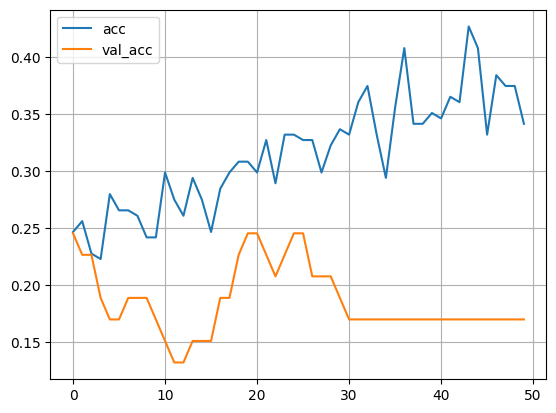

2/2 [==============================] - 0s 4ms/step - loss: 1.4653 - acc: 0.1698
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.974621853082232
r2_score in Simulation Failt  void  for Each Blade :  0.9862135352709195
Error in Simulation Fault for Each Blade :  1.8980192479540992  --- r2_score Fault S ----  0.9697068954716703
Error in Simulation Fault T  for Each Blade :  1.8980192479540992  --- r2_score Fault T :  0.9799515812023086
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9896973749491167
r2_score in Simulation Failt  void  for Each Blade :  0.990210596698521
Error in Simulation Fault for Each Blade :  0.37661042831075253  --- r2_score Fault S ----  0.9748890265235076
Error in Simulation Fault T  for Each Blade :  0.37661042831075253  --- r2_score Fault T :  0.9607749241838617
 ----- for each Blade Simulated 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.16981132075471697
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

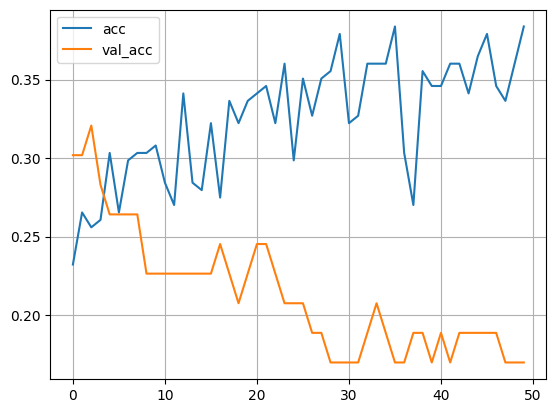

2/2 [==============================] - 0s 4ms/step - loss: 1.4464 - acc: 0.1698
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9895587732733558
r2_score in Simulation Failt  void  for Each Blade :  0.9897933179939652
Error in Simulation Fault for Each Blade :  0.9056681836955023  --- r2_score Fault S ----  0.9874654022320782
Error in Simulation Fault T  for Each Blade :  0.9056681836955023  --- r2_score Fault T :  0.9693902809219143
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9868109411404115
r2_score in Simulation Failt  void  for Each Blade :  0.9633525781489308
Error in Simulation Fault for Each Blade :  0.8722240257182303  --- r2_score Fault S ----  0.9822467601029773
Error in Simulation Fault T  for Each Blade :  0.8722240257182303  --- r2_score Fault T :  0.972381063426935
 ----- for each Blade Simulated -

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

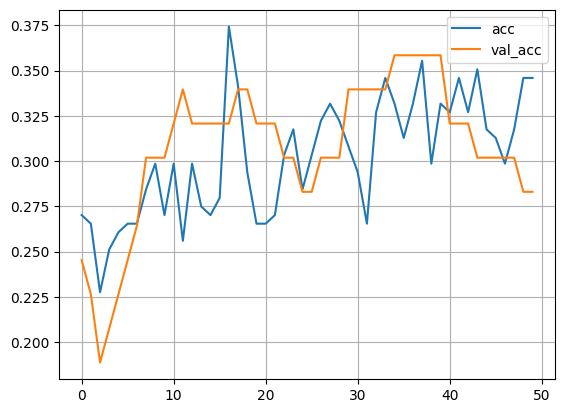

2/2 [==============================] - 0s 4ms/step - loss: 1.3633 - acc: 0.2830
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9804104313625356
r2_score in Simulation Failt  void  for Each Blade :  0.974658754104542
Error in Simulation Fault for Each Blade :  0.3098654424363365  --- r2_score Fault S ----  0.9934658200977979
Error in Simulation Fault T  for Each Blade :  0.3098654424363365  --- r2_score Fault T :  0.9485846342517755
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9867354815431134
r2_score in Simulation Failt  void  for Each Blade :  0.9929222486322136
Error in Simulation Fault for Each Blade :  -0.6261180126564525  --- r2_score Fault S ----  0.9772124207660757
Error in Simulation Fault T  for Each Blade :  -0.6261180126564525  --- r2_score Fault T :  0.9781459328005382
 ----- for each Blade Simulated

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.24528301886792453
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

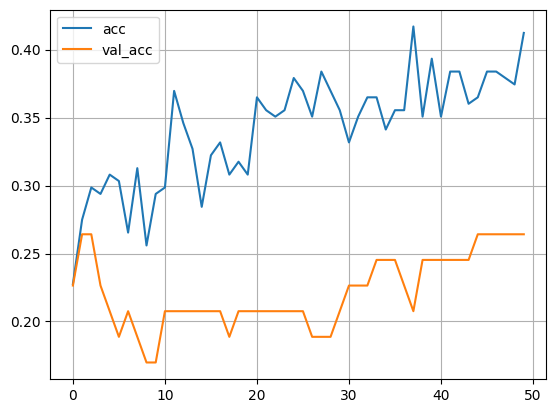

2/2 [==============================] - 0s 5ms/step - loss: 1.4723 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9704691843045855
r2_score in Simulation Failt  void  for Each Blade :  0.9801149327267535
Error in Simulation Fault for Each Blade :  -1.2871852373491284  --- r2_score Fault S ----  0.9847993628055967
Error in Simulation Fault T  for Each Blade :  -1.2871852373491284  --- r2_score Fault T :  0.9916460599318924
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9837087730188524
r2_score in Simulation Failt  void  for Each Blade :  0.972888814619328
Error in Simulation Fault for Each Blade :  1.4854916592544734  --- r2_score Fault S ----  0.9848084731566353
Error in Simulation Fault T  for Each Blade :  1.4854916592544734  --- r2_score Fault T :  0.9697968574798544
 ----- for each Blade Simulated

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2641509433962264
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

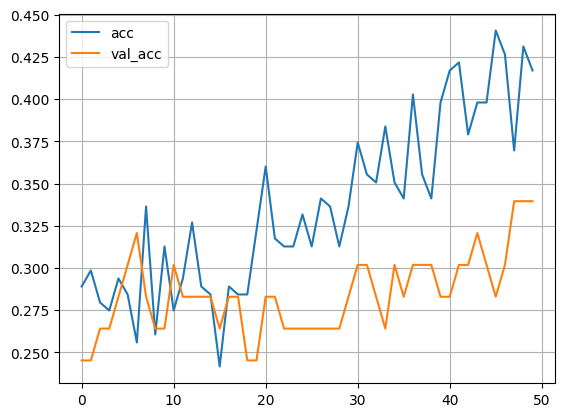

2/2 [==============================] - 0s 5ms/step - loss: 1.3368 - acc: 0.3396
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9681274441746304
r2_score in Simulation Failt  void  for Each Blade :  0.9884862832604004
Error in Simulation Fault for Each Blade :  -0.454673169173762  --- r2_score Fault S ----  0.9885611658370723
Error in Simulation Fault T  for Each Blade :  -0.454673169173762  --- r2_score Fault T :  0.9789454189351225
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9644649295747633
r2_score in Simulation Failt  void  for Each Blade :  0.9883621458596925
Error in Simulation Fault for Each Blade :  0.6222747352552052  --- r2_score Fault S ----  0.9873019526121046
Error in Simulation Fault T  for Each Blade :  0.6222747352552052  --- r2_score Fault T :  0.9889552561142971
 ----- for each Blade Simulated 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2641509433962264
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

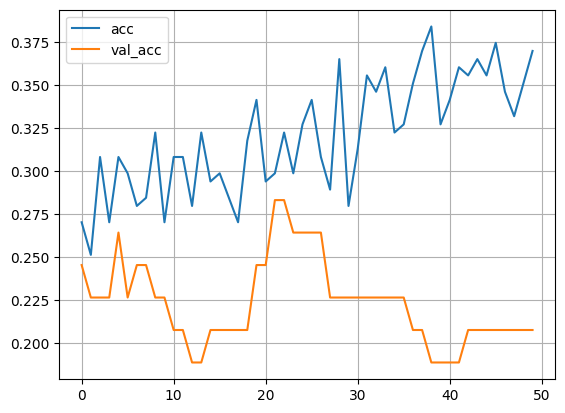

2/2 [==============================] - 0s 5ms/step - loss: 1.4495 - acc: 0.2075
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9896706333125662
r2_score in Simulation Failt  void  for Each Blade :  0.9756687104260677
Error in Simulation Fault for Each Blade :  0.2008593870762465  --- r2_score Fault S ----  0.9730980553227562
Error in Simulation Fault T  for Each Blade :  0.2008593870762465  --- r2_score Fault T :  0.9679882788113902
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9805420016661357
r2_score in Simulation Failt  void  for Each Blade :  0.9645454625522798
Error in Simulation Fault for Each Blade :  1.2180473429552103  --- r2_score Fault S ----  0.9851817385170442
Error in Simulation Fault T  for Each Blade :  1.2180473429552103  --- r2_score Fault T :  0.9677276910683759
 ----- for each Blade Simulated 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2830188679245283
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

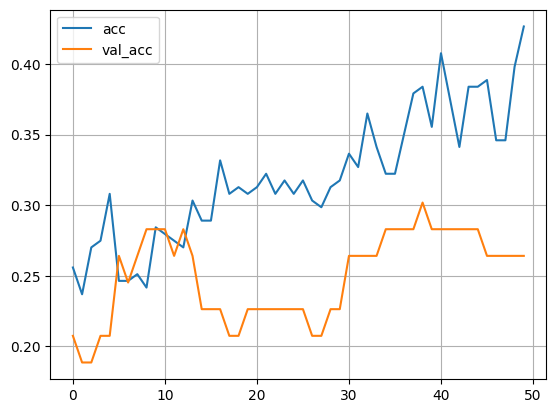

2/2 [==============================] - 0s 5ms/step - loss: 1.3726 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9836476412238607
r2_score in Simulation Failt  void  for Each Blade :  0.9730386052265527
Error in Simulation Fault for Each Blade :  1.268877534301422  --- r2_score Fault S ----  0.9587874723489396
Error in Simulation Fault T  for Each Blade :  1.268877534301422  --- r2_score Fault T :  0.9667103504119169
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9770424107847347
r2_score in Simulation Failt  void  for Each Blade :  0.99183611883995
Error in Simulation Fault for Each Blade :  0.04914180184431172  --- r2_score Fault S ----  0.9822599790272171
Error in Simulation Fault T  for Each Blade :  0.04914180184431172  --- r2_score Fault T :  0.9834394041512935
 ----- for each Blade Simulated --

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.41509433962264153
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

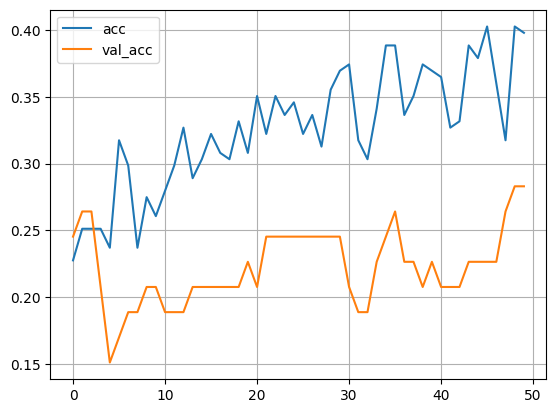

2/2 [==============================] - 0s 5ms/step - loss: 1.4045 - acc: 0.2830
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9782199019958502
r2_score in Simulation Failt  void  for Each Blade :  0.9959879649704335
Error in Simulation Fault for Each Blade :  -0.043377014148331394  --- r2_score Fault S ----  0.9870432071057231
Error in Simulation Fault T  for Each Blade :  -0.043377014148331394  --- r2_score Fault T :  0.9763070293457216
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9466679596119744
r2_score in Simulation Failt  void  for Each Blade :  0.9849456918310688
Error in Simulation Fault for Each Blade :  -1.6959731116094816  --- r2_score Fault S ----  0.972082124758827
Error in Simulation Fault T  for Each Blade :  -1.6959731116094816  --- r2_score Fault T :  0.9642285578939842
 ----- for each Blade Sim

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.18867924528301888
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

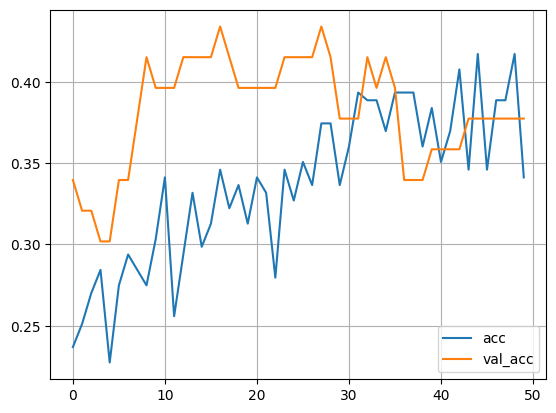

2/2 [==============================] - 0s 4ms/step - loss: 1.4060 - acc: 0.3774
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9884808414538715
r2_score in Simulation Failt  void  for Each Blade :  0.9737296937113088
Error in Simulation Fault for Each Blade :  1.10888493146168  --- r2_score Fault S ----  0.9608425455132863
Error in Simulation Fault T  for Each Blade :  1.10888493146168  --- r2_score Fault T :  0.960296761853666
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9827704859328836
r2_score in Simulation Failt  void  for Each Blade :  0.9420845234160155
Error in Simulation Fault for Each Blade :  -0.19502130057996414  --- r2_score Fault S ----  0.9798836405080132
Error in Simulation Fault T  for Each Blade :  -0.19502130057996414  --- r2_score Fault T :  0.9669836493462123
 ----- for each Blade Simulated -

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

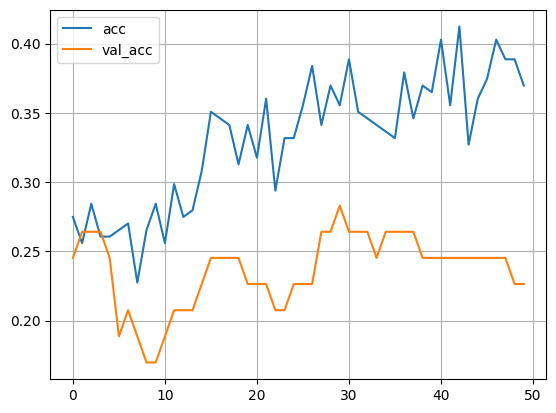

2/2 [==============================] - 0s 4ms/step - loss: 1.4630 - acc: 0.2264
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.978063989309907
r2_score in Simulation Failt  void  for Each Blade :  0.9721520823947396
Error in Simulation Fault for Each Blade :  -1.9649864761100808  --- r2_score Fault S ----  0.9713712839777193
Error in Simulation Fault T  for Each Blade :  -1.9649864761100808  --- r2_score Fault T :  0.9912220993073906
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9874413959642392
r2_score in Simulation Failt  void  for Each Blade :  0.9808939356342967
Error in Simulation Fault for Each Blade :  -2.3393106475443064  --- r2_score Fault S ----  0.9756532961980546
Error in Simulation Fault T  for Each Blade :  -2.3393106475443064  --- r2_score Fault T :  0.9858996374434582
 ----- for each Blade Simulat

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

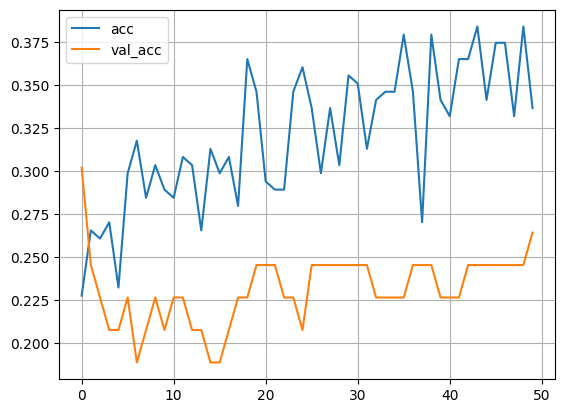

2/2 [==============================] - 0s 5ms/step - loss: 1.4081 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9668834568063355
r2_score in Simulation Failt  void  for Each Blade :  0.9947626495605406
Error in Simulation Fault for Each Blade :  1.335928129842129  --- r2_score Fault S ----  0.9884117334368466
Error in Simulation Fault T  for Each Blade :  1.335928129842129  --- r2_score Fault T :  0.9825455429136992
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9843624053075434
r2_score in Simulation Failt  void  for Each Blade :  0.990865119497835
Error in Simulation Fault for Each Blade :  1.2406598975339103  --- r2_score Fault S ----  0.9630946202467614
Error in Simulation Fault T  for Each Blade :  1.2406598975339103  --- r2_score Fault T :  0.9699854275961136
 ----- for each Blade Simulated ---

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3584905660377358
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

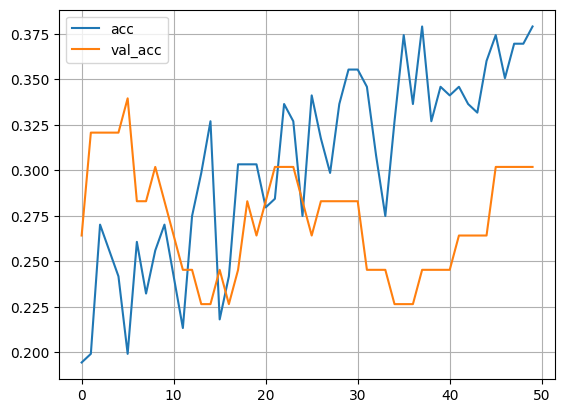

2/2 [==============================] - 0s 5ms/step - loss: 1.3988 - acc: 0.3019
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9811163294158571
r2_score in Simulation Failt  void  for Each Blade :  0.9618341399468933
Error in Simulation Fault for Each Blade :  -0.49490533477675847  --- r2_score Fault S ----  0.9922320631427348
Error in Simulation Fault T  for Each Blade :  -0.49490533477675847  --- r2_score Fault T :  0.9905015348053958
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9811183796347214
r2_score in Simulation Failt  void  for Each Blade :  0.9722346019665732
Error in Simulation Fault for Each Blade :  -1.0252906483757238  --- r2_score Fault S ----  0.9845952164032041
Error in Simulation Fault T  for Each Blade :  -1.0252906483757238  --- r2_score Fault T :  0.9903065281192719
 ----- for each Blade Simu

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2830188679245283
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

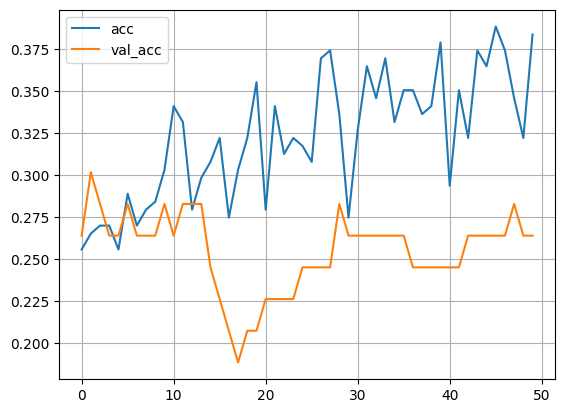

2/2 [==============================] - 0s 4ms/step - loss: 1.4572 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9630930173799652
r2_score in Simulation Failt  void  for Each Blade :  0.9771682201221794
Error in Simulation Fault for Each Blade :  0.8839288442584028  --- r2_score Fault S ----  0.9583238296696486
Error in Simulation Fault T  for Each Blade :  0.8839288442584028  --- r2_score Fault T :  0.9754016419385443
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9870360886941476
r2_score in Simulation Failt  void  for Each Blade :  0.9757727378809673
Error in Simulation Fault for Each Blade :  0.3897405756450789  --- r2_score Fault S ----  0.9923575957261899
Error in Simulation Fault T  for Each Blade :  0.3897405756450789  --- r2_score Fault T :  0.9731760554983871
 ----- for each Blade Simulated 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

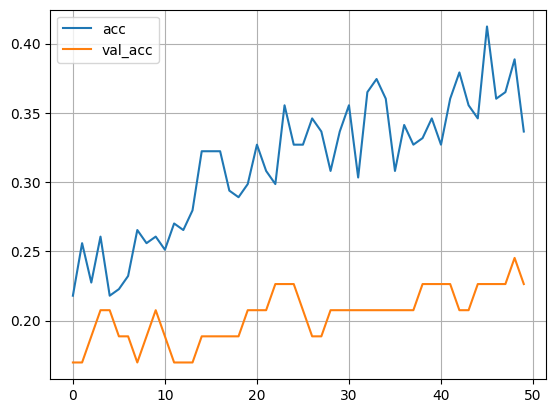

2/2 [==============================] - 0s 4ms/step - loss: 1.4294 - acc: 0.2264
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9898986805497169
r2_score in Simulation Failt  void  for Each Blade :  0.9801969485106511
Error in Simulation Fault for Each Blade :  0.802236086994073  --- r2_score Fault S ----  0.9838991694014648
Error in Simulation Fault T  for Each Blade :  0.802236086994073  --- r2_score Fault T :  0.9860394346139214
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9944505875878968
r2_score in Simulation Failt  void  for Each Blade :  0.9845152788887471
Error in Simulation Fault for Each Blade :  -2.837080091777866  --- r2_score Fault S ----  0.9613117673010598
Error in Simulation Fault T  for Each Blade :  -2.837080091777866  --- r2_score Fault T :  0.9683486965859173
 ----- for each Blade Simulated --

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2830188679245283
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

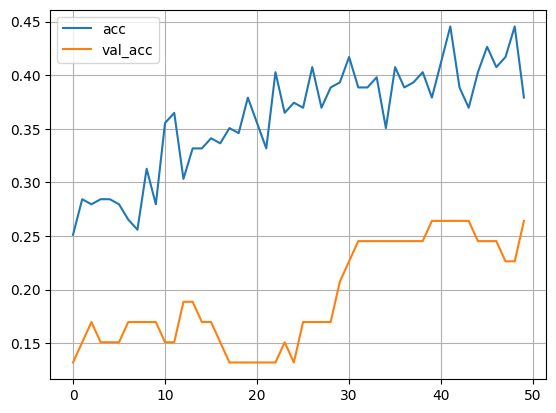

2/2 [==============================] - 0s 4ms/step - loss: 1.4549 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9908524536371903
r2_score in Simulation Failt  void  for Each Blade :  0.9653947852104309
Error in Simulation Fault for Each Blade :  0.42289278942947117  --- r2_score Fault S ----  0.9768126702062254
Error in Simulation Fault T  for Each Blade :  0.42289278942947117  --- r2_score Fault T :  0.986081401262521
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9790832887044124
r2_score in Simulation Failt  void  for Each Blade :  0.9771970513973168
Error in Simulation Fault for Each Blade :  -1.56302205105565  --- r2_score Fault S ----  0.9799656904081194
Error in Simulation Fault T  for Each Blade :  -1.56302205105565  --- r2_score Fault T :  0.9792672520292449
 ----- for each Blade Simulated -

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2830188679245283
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

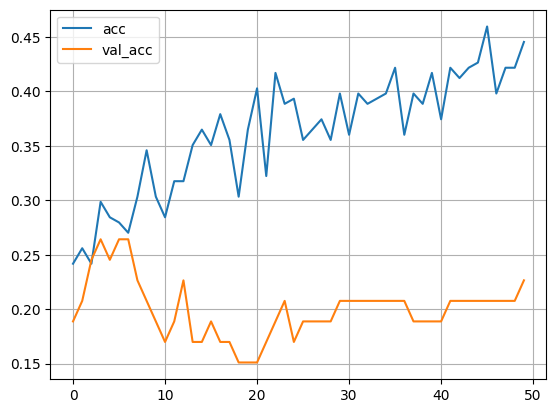

2/2 [==============================] - 0s 4ms/step - loss: 1.4839 - acc: 0.2264
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9917011569386753
r2_score in Simulation Failt  void  for Each Blade :  0.9770947043946967
Error in Simulation Fault for Each Blade :  -1.6897779705714897  --- r2_score Fault S ----  0.9643053349095161
Error in Simulation Fault T  for Each Blade :  -1.6897779705714897  --- r2_score Fault T :  0.9831181892852313
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9837482100608725
r2_score in Simulation Failt  void  for Each Blade :  0.9764645925901574
Error in Simulation Fault for Each Blade :  0.4125716214882347  --- r2_score Fault S ----  0.9889184387268952
Error in Simulation Fault T  for Each Blade :  0.4125716214882347  --- r2_score Fault T :  0.9801288030321788
 ----- for each Blade Simulate

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

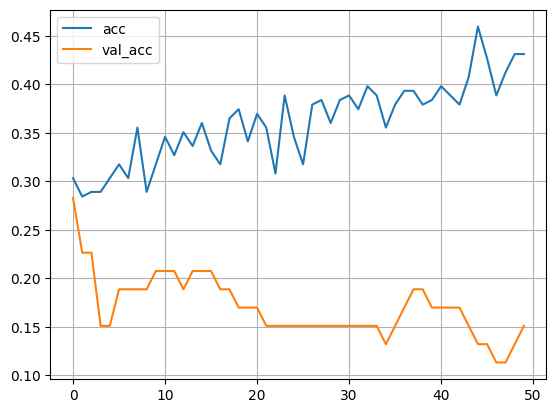

2/2 [==============================] - 0s 4ms/step - loss: 1.5063 - acc: 0.1509
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9863239424486894
r2_score in Simulation Failt  void  for Each Blade :  0.977524801432437
Error in Simulation Fault for Each Blade :  0.7737953513148468  --- r2_score Fault S ----  0.9790236207620795
Error in Simulation Fault T  for Each Blade :  0.7737953513148468  --- r2_score Fault T :  0.9821539039228303
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9731826841164886
r2_score in Simulation Failt  void  for Each Blade :  0.9908787605642917
Error in Simulation Fault for Each Blade :  0.7076858335387186  --- r2_score Fault S ----  0.9825004848898514
Error in Simulation Fault T  for Each Blade :  0.7076858335387186  --- r2_score Fault T :  0.9865289002783283
 ----- for each Blade Simulated -

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.22641509433962265
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

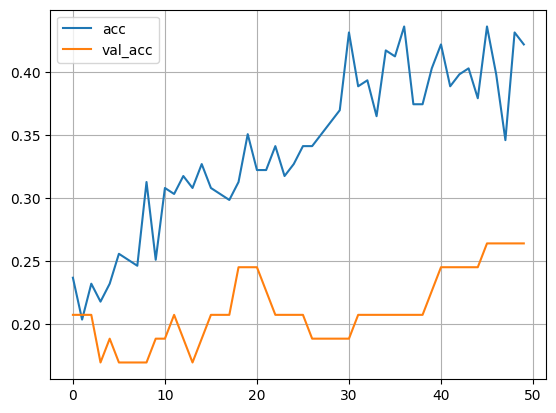

2/2 [==============================] - 0s 4ms/step - loss: 1.4102 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9887875642233857
r2_score in Simulation Failt  void  for Each Blade :  0.9911869608712416
Error in Simulation Fault for Each Blade :  1.115848125404308  --- r2_score Fault S ----  0.9714704195126997
Error in Simulation Fault T  for Each Blade :  1.115848125404308  --- r2_score Fault T :  0.9732082547491662
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9860184903587615
r2_score in Simulation Failt  void  for Each Blade :  0.9855526194600647
Error in Simulation Fault for Each Blade :  0.7158981435872498  --- r2_score Fault S ----  0.9813664337781834
Error in Simulation Fault T  for Each Blade :  0.7158981435872498  --- r2_score Fault T :  0.9921161462442671
 ----- for each Blade Simulated --

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.2641509433962264
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

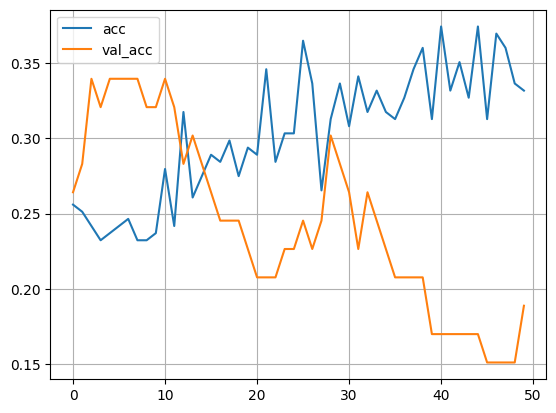

2/2 [==============================] - 0s 5ms/step - loss: 1.4860 - acc: 0.1887
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.984800194245863
r2_score in Simulation Failt  void  for Each Blade :  0.9921371799472796
Error in Simulation Fault for Each Blade :  -0.7113312297587366  --- r2_score Fault S ----  0.9733684263640713
Error in Simulation Fault T  for Each Blade :  -0.7113312297587366  --- r2_score Fault T :  0.9716442018319044
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9913744608750996
r2_score in Simulation Failt  void  for Each Blade :  0.9877611606809178
Error in Simulation Fault for Each Blade :  -1.1183757151280083  --- r2_score Fault S ----  0.9857077449728117
Error in Simulation Fault T  for Each Blade :  -1.1183757151280083  --- r2_score Fault T :  0.9819374906435882
 ----- for each Blade Simulat

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.39622641509433965
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

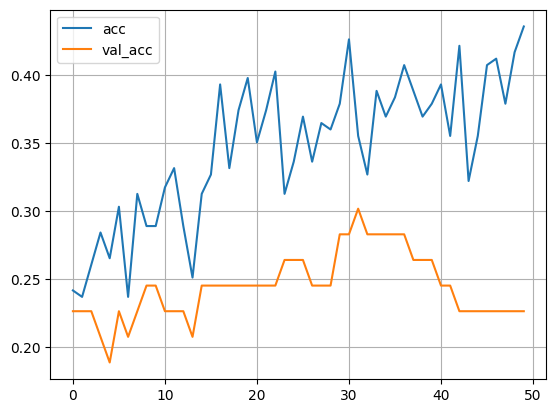

2/2 [==============================] - 0s 4ms/step - loss: 1.4468 - acc: 0.2264
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9688950004478692
r2_score in Simulation Failt  void  for Each Blade :  0.9674853670615156
Error in Simulation Fault for Each Blade :  0.4241975215126388  --- r2_score Fault S ----  0.9797289818072176
Error in Simulation Fault T  for Each Blade :  0.4241975215126388  --- r2_score Fault T :  0.9913467040701892
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9659738904701276
r2_score in Simulation Failt  void  for Each Blade :  0.9890505102743277
Error in Simulation Fault for Each Blade :  -2.0845237071179104  --- r2_score Fault S ----  0.9731209936258736
Error in Simulation Fault T  for Each Blade :  -2.0845237071179104  --- r2_score Fault T :  0.9835136851281684
 ----- for each Blade Simulate

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3018867924528302
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

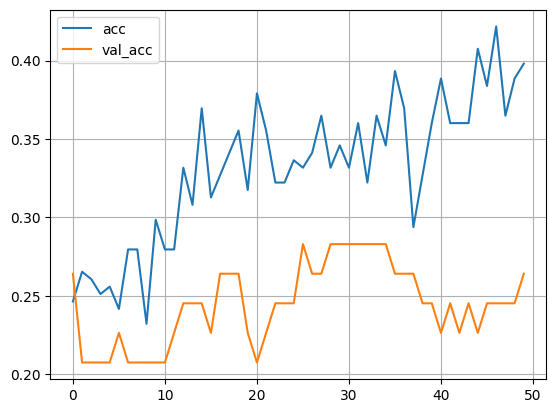

2/2 [==============================] - 0s 4ms/step - loss: 1.4578 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.984437371837019
r2_score in Simulation Failt  void  for Each Blade :  0.9947266589777808
Error in Simulation Fault for Each Blade :  -1.8182744079530098  --- r2_score Fault S ----  0.970384023224792
Error in Simulation Fault T  for Each Blade :  -1.8182744079530098  --- r2_score Fault T :  0.968818056224717
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9828337740125536
r2_score in Simulation Failt  void  for Each Blade :  0.9906466952740178
Error in Simulation Fault for Each Blade :  0.9030129737830404  --- r2_score Fault S ----  0.9738247367924558
Error in Simulation Fault T  for Each Blade :  0.9030129737830404  --- r2_score Fault T :  0.9671141650013424
 ----- for each Blade Simulated -

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.16981132075471697
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

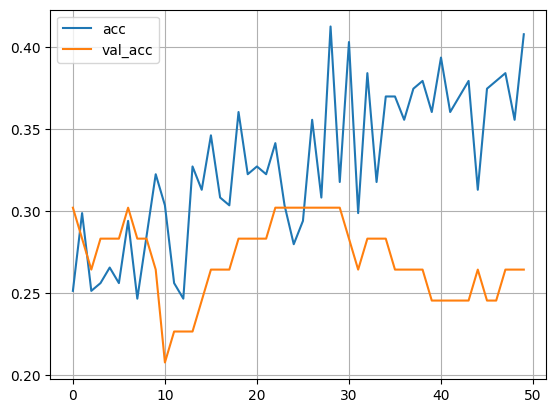

2/2 [==============================] - 0s 5ms/step - loss: 1.4596 - acc: 0.2642
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9603618321154477
r2_score in Simulation Failt  void  for Each Blade :  0.9761384461579409
Error in Simulation Fault for Each Blade :  -0.41014765987953483  --- r2_score Fault S ----  0.9560725184307913
Error in Simulation Fault T  for Each Blade :  -0.41014765987953483  --- r2_score Fault T :  0.9516764761452937
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9886442809332237
r2_score in Simulation Failt  void  for Each Blade :  0.9830759122796617
Error in Simulation Fault for Each Blade :  1.0283462380212085  --- r2_score Fault S ----  0.9788291594531934
Error in Simulation Fault T  for Each Blade :  1.0283462380212085  --- r2_score Fault T :  0.9765393388172733
 ----- for each Blade Simula

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

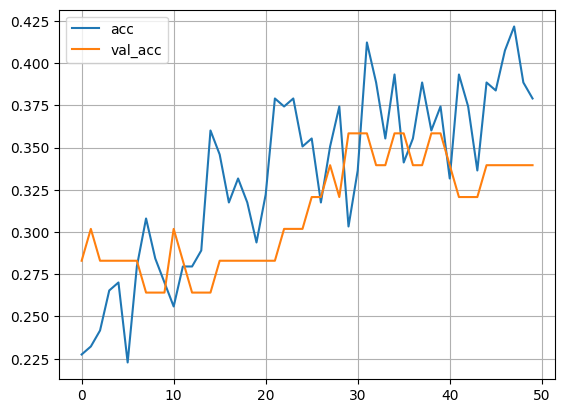

2/2 [==============================] - 0s 4ms/step - loss: 1.3832 - acc: 0.3396
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9702168092673581
r2_score in Simulation Failt  void  for Each Blade :  0.982433464367272
Error in Simulation Fault for Each Blade :  -0.1416931227115379  --- r2_score Fault S ----  0.9841557295558797
Error in Simulation Fault T  for Each Blade :  -0.1416931227115379  --- r2_score Fault T :  0.9824230162626175
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9855371422071262
r2_score in Simulation Failt  void  for Each Blade :  0.9749305151216136
Error in Simulation Fault for Each Blade :  0.5987492433901171  --- r2_score Fault S ----  0.9747311295587398
Error in Simulation Fault T  for Each Blade :  0.5987492433901171  --- r2_score Fault T :  0.9880562994240081
 ----- for each Blade Simulated

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.20754716981132076
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=

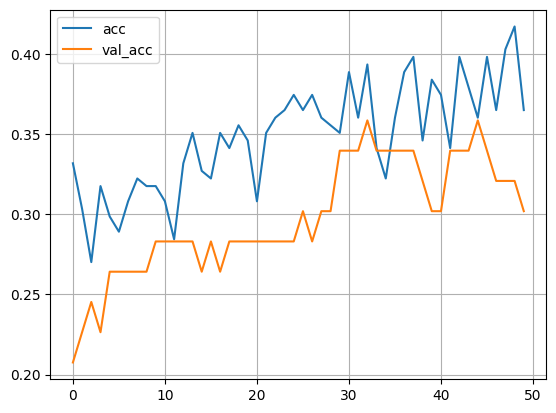

2/2 [==============================] - 0s 4ms/step - loss: 1.4028 - acc: 0.3019
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.98513793859562
r2_score in Simulation Failt  void  for Each Blade :  0.9754565258083381
Error in Simulation Fault for Each Blade :  -0.08066987364966693  --- r2_score Fault S ----  0.9880383803487582
Error in Simulation Fault T  for Each Blade :  -0.08066987364966693  --- r2_score Fault T :  0.9812501857990747
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9918543904630736
r2_score in Simulation Failt  void  for Each Blade :  0.9848969579816874
Error in Simulation Fault for Each Blade :  -0.9717860463142407  --- r2_score Fault S ----  0.9687505146814512
Error in Simulation Fault T  for Each Blade :  -0.9717860463142407  --- r2_score Fault T :  0.9841621882005694
 ----- for each Blade Simula

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.1509433962264151
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 

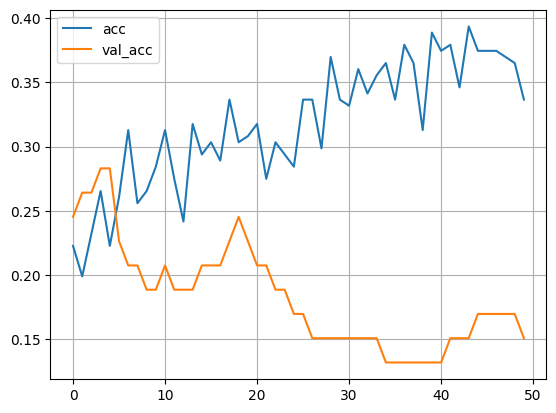

2/2 [==============================] - 0s 4ms/step - loss: 1.5536 - acc: 0.1509
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 


In [8]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(2):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30     )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 ,  )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 ,  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} , location : {locate}")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.5 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='Fault_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error

          print("r2_score in Simulation Health for Each Blade : " , r2_score(z_predict, z_test) )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]

          total_new_generate_health_t = []
          total_error_health_t = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error

          print("r2_score in Simulation Failt  void  for Each Blade : " , r2_score(z_predict_health_t, z_test) )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- r2_score Fault S ---- " ,  r2_score(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault_t = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault

          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- r2_score Fault T : " ,  r2_score(z_predict_fault_t, z_test_fault_t)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault_t, z_test_fault_t),locate ,  3 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health_t[ : , 3 ] ,  'betha_3':params_health_t[ : , 4 ] , 'betha_4':params_health_t[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health_t[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'R2' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'R2' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.title(f"For This  alpha : {iter_alpha} and void : {iter_flat / 10 }  ")
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.2  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 4 )
    new_y_u_test_cat  = to_categorical(y_u_test , 4 )

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(4 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    total_simulation['ann'].append(model_learning.evaluate(x_u_test , new_y_u_test_cat)[1])

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")












In [9]:

df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [10]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


mean fault t :  1.7539037448940022  - mean fault :  1.7550750560430894  - mean health :  1.74585219176045


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

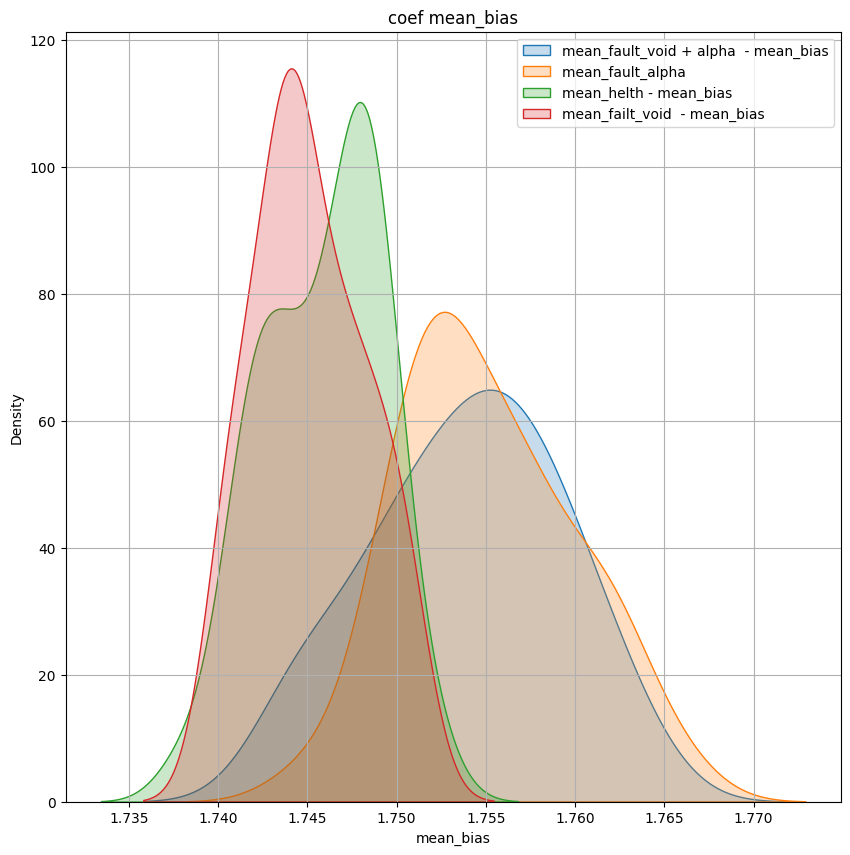

<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


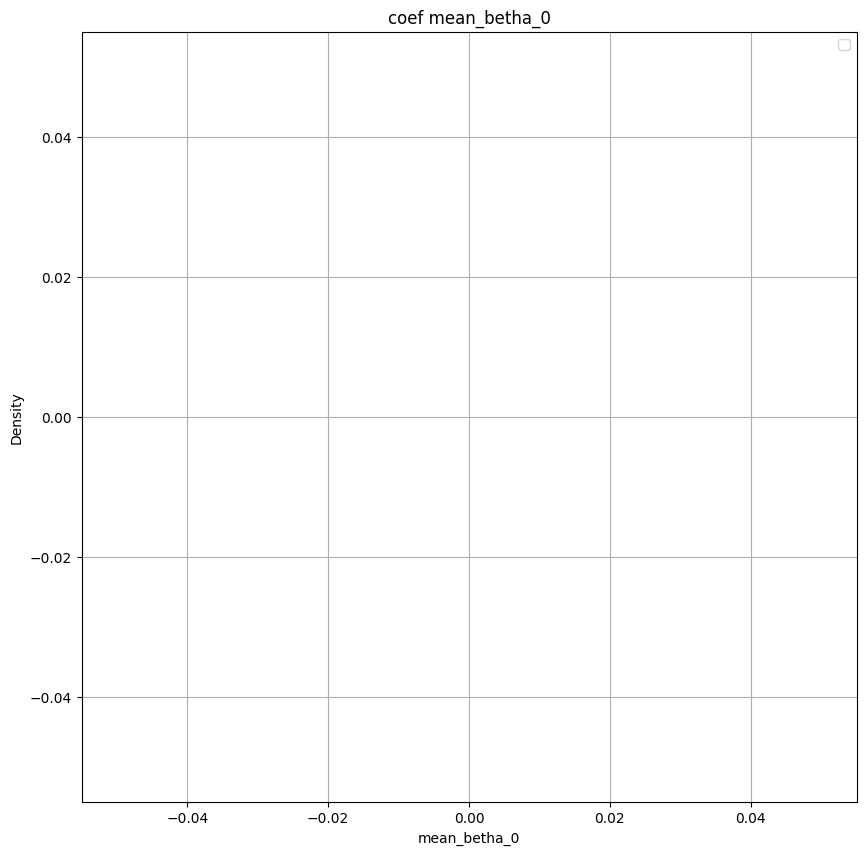

mean fault t :  -1.060470935572062  - mean fault :  -1.0637014589972216  - mean health :  -1.056437266784623


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

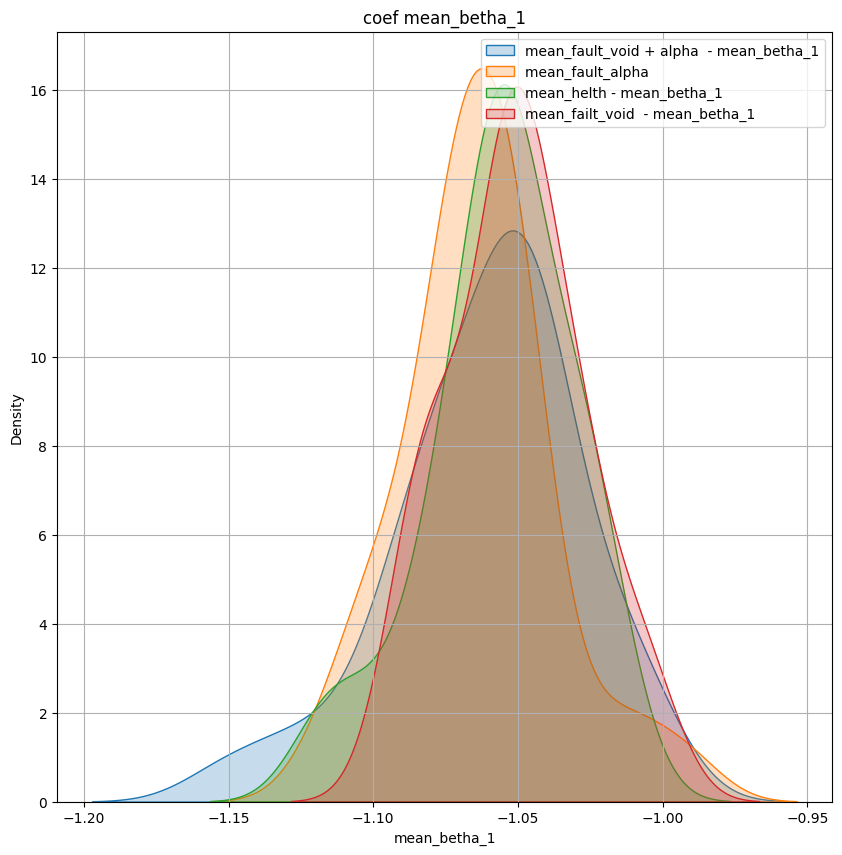

mean fault t :  -0.07458620153755446  - mean fault :  -0.0755844394354604  - mean health :  -0.07362111034125185


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

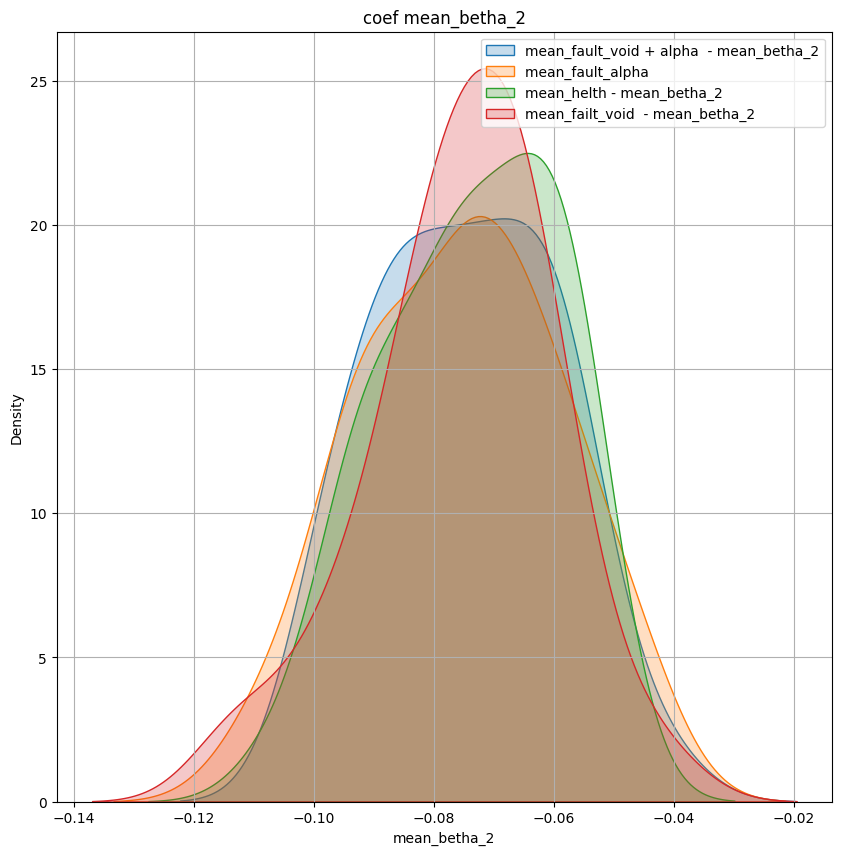

mean fault t :  2.8058448068626793  - mean fault :  2.812577706154591  - mean health :  2.7931410558251715


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

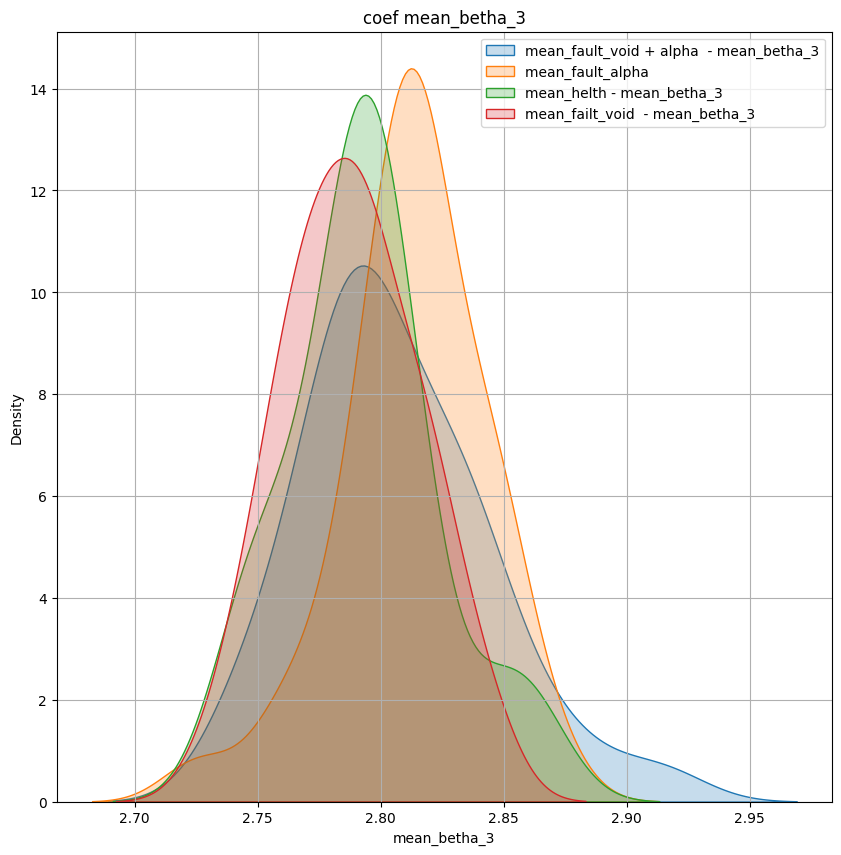

mean fault t :  0.08622668496171197  - mean fault :  0.0914960561235561  - mean health :  0.08748563823111061


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

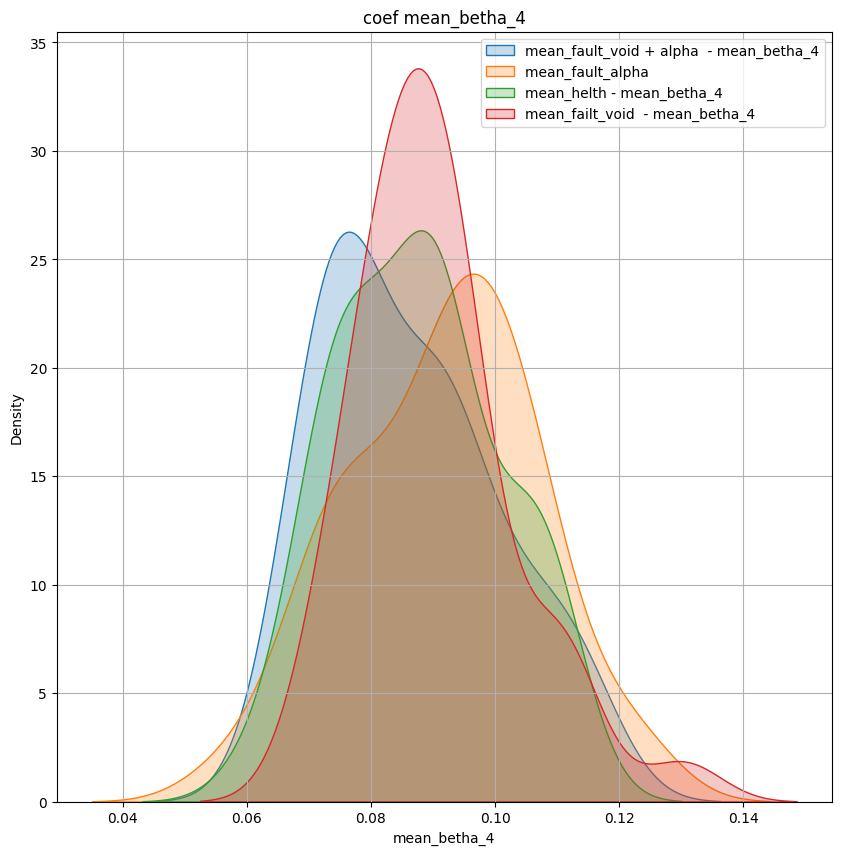

mean fault t :  -0.017470274982254803  - mean fault :  -0.015264313858774768  - mean health :  -0.01591187306099641


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

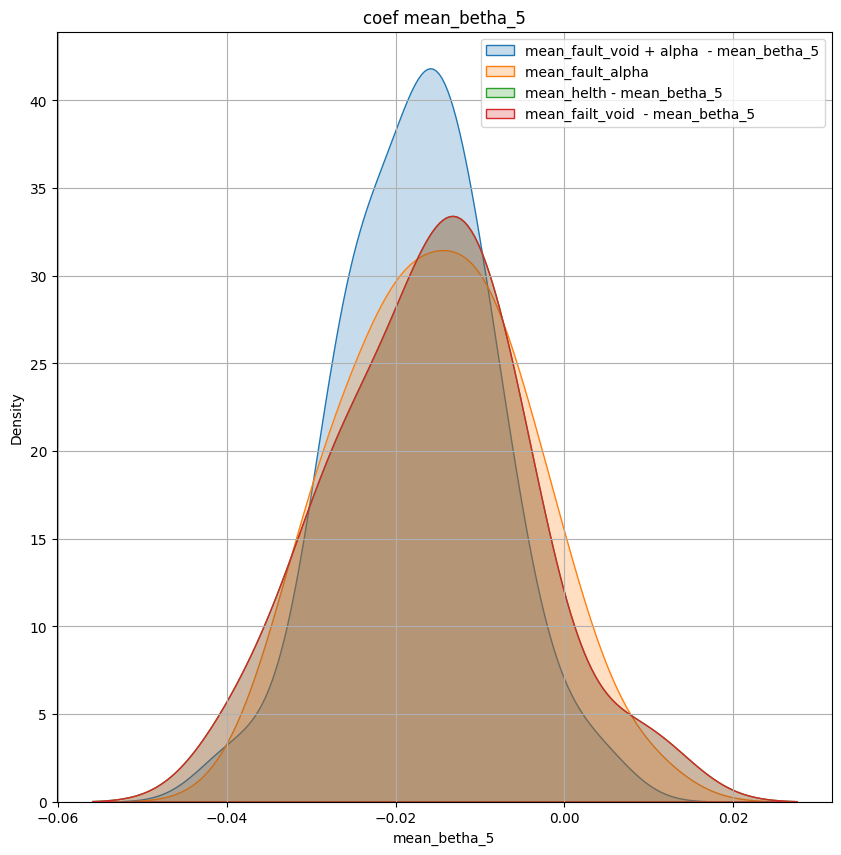

In [11]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [12]:
df_result = pd.DataFrame(total_simulation)


In [24]:
df_result.columns

Index(['bias_correlation', 'betha_0_correlation', 'betha_1_correlation',
       'betha_2_correlation', 'betha_3_correlation', 'betha_4_correlation',
       'betha_5_correlation', 'alpha', 'flap', 'accuracy_nav',
       'accuracy_random_forest', 'n_estimators_RF', 'max_features_RF',
       'max_depth_RF', 'criterion_RF', 'accuracy_extra_classifier',
       'accuracy_svc_', 'C_svc', 'kernel_svc', 'gamma_svc', 'ann'],
      dtype='object')

In [14]:
df_result.sample(20)

bias_correlation  betha_0_correlation  betha_1_correlation  \
0           0.008308                  NaN             0.002572   
15          0.011183                  NaN             0.040356   
8           0.006091                  NaN             0.040555   
33          0.031501                  NaN            -0.131838   
3           0.004844                  NaN             0.005825   
26          0.013871                  NaN             0.048267   
7           0.006334                  NaN             0.017792   
21          0.013388                  NaN            -0.049728   
28          0.015046                  NaN            -0.023945   
31          0.033382                  NaN            -0.082225   
19          0.015841                  NaN            -0.022127   
14          0.013823                  NaN             0.042482   
12          0.005450                  NaN             0.019897   
11         -0.003642                  NaN             0.114917   
30          0.016581                  NaN             0.010967   
18          0.025031                  NaN            -0.157417   
27          0.033943                  NaN            -0.079313   
32          0.022168                  NaN            -0.028455   
23          0.015441                  NaN             0.016952   
34          0.027469                  NaN            -0.046851   

    betha_2_correlation  betha_3_correlation  betha_4_correlation  \
0             -0.050863             0.011434             0.043355   
15            -0.044304            -0.011931             0.065806   
8             -0.010643            -0.029547             0.008616   
33            -0.020838             0.149410             0.000341   
3             -0.022159            -0.000235            -0.005349   
26            -0.087074            -0.019330             0.068521   
7              0.026987            -0.020269            -0.074432   
21            -0.015836             0.062283            -0.029120   
28             0.050921             0.032978            -0.013783   
31            -0.025443             0.121004             0.064188   
19            -0.085490             0.047208             0.052355   
14            -0.104472            -0.003126             0.111231   
12            -0.030761            -0.009138             0.015768   
11             0.055279            -0.109014            -0.023436   
30             0.098788             0.002661            -0.032393   
18            -0.015089             0.173872             0.004342   
27             0.084542             0.089515            -0.081188   
32             0.052060             0.040277            -0.070764   
23             0.021593            -0.002413            -0.046684   
34             0.039376             0.071772            -0.025701   

    betha_5_correlation  alpha  flap  accuracy_nav  ...  n_estimators_RF  \
0             -0.054876  0.001     1      0.264151  ...              500   
15            -0.033701  0.004     4      0.169811  ...              200   
8             -0.024466  0.003     1      0.150943  ...              500   
33            -0.032396  0.009     2      0.226415  ...              200   
3             -0.030513  0.001     4      0.264151  ...              200   
26            -0.033259  0.007     3      0.207547  ...              200   
7             -0.027079  0.002     4      0.226415  ...              500   
21            -0.087015  0.006     2      0.169811  ...              200   
28             0.094457  0.008     1      0.207547  ...              500   
31             0.012201  0.008     4      0.207547  ...              200   
19            -0.092956  0.005     4      0.245283  ...              200   
14            -0.060737  0.004     3      0.207547  ...              200   
12            -0.015241  0.004     1      0.245283  ...              500   
11             0.114278  0.003     4      0.339623  ...              500   
30             0.150355  0.

In [25]:
df_svc_group = df_result.groupby(['alpha' , 'flap' , 'n_estimators_RF' , 'max_features_RF' , 'max_depth_RF' , 'criterion_RF' ]).agg({'accuracy_random_forest' : ['min' , 'mean' , 'max'] })

In [26]:
df_svc_group

accuracy_random_forest  \
                                                                                        min   
alpha flap n_estimators_RF max_features_RF max_depth_RF criterion_RF                          
0.001 1    500             sqrt            4            gini                       0.226415   
      2    500             sqrt            6            gini                       0.245283   
      3    500             sqrt            8            gini                       0.226415   
      4    200             sqrt            4            entropy                    0.264151   
0.002 1    200             sqrt            4            entropy                    0.207547   
      2    200             sqrt            6            entropy                    0.226415   
      3    200             sqrt            8            entropy                    0.207547   
      4    500             sqrt            5            entropy                    0.169811   
0.003 1    500             sqrt            8            gini                       0.188679   
      2    200             sqrt            6            gini                       0.150943   
      3    500             sqrt            4            entropy                    0.226415   
      4    500             sqrt            7            entropy                    0.283019   
0.004 1    500             sqrt            4            gini                       0.169811   
      2    200             sqrt            8            entropy                    0.226415   
      3    200             sqrt            7            gini                       0.245283   
      4    200             sqrt            5            entropy                    0.264151   
0.005 1    500             sqrt            4            gini                       0.264151   
      2    500             sqrt            8            entropy                    0.283019   
      3    200             sqrt            4            gini                       0.415094   
      4    200             sqrt            5            gini                       0.188679   
0.006 1    500             sqrt            5            entropy                    0.207547   
      2    200             sqrt            8            entropy                    0.207547   
      3    200             sqrt            5            gini                       0.358491   
      4    200             sqrt            5            entropy                    0.283019   
0.007 1    200             sqrt            5            gini                       0.226415   
      2    500             sqrt            4            entropy                    0.283019   
      3    200             sqrt            7            entropy                    0.283019   
      4    200             sqrt            4            gini                       0.226415   
0.008 1    500             sqrt            6            gini                       0.226415   
      2    200             sqrt            4            gini                       0.264151   
      3    500             sqrt            6            gini                       0.396226   
      4    200             sqrt            4            gini                       0.301887   
0.009 1    200             sqrt            6            entropy                    0.169811   
      2    200             sqrt            5            entropy                    0.207547   
      3    200             sqrt            8            entropy                    0.207547   
      4    200             sqrt            6            entropy                    0.150943   

                                                                                \
                                                                          mean   
alpha flap n_estimators_RF max_features_RF max_depth_RF criterion_RF             
0.001 1    500             sqrt            4            gini          0.226415   
      2    500             sqrt    

In [21]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_svc_group)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df_svc_group.plot(x = 'alpha' , y = 'accuracy_svc_mean')

KeyError: 'alpha'

IndexError: single positional indexer is out-of-bounds

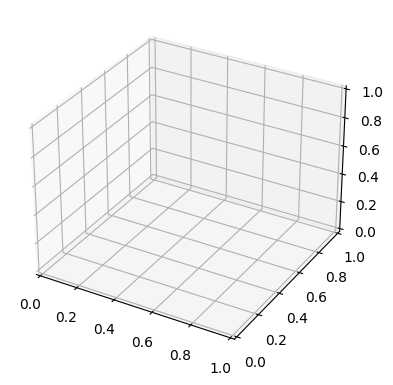

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_svc_group.iloc[: , 0 ] , df_svc_group.iloc[: , 1 ] , df_svc_group[: , 3])
plt.legend()
plt.grid()
plt.show()

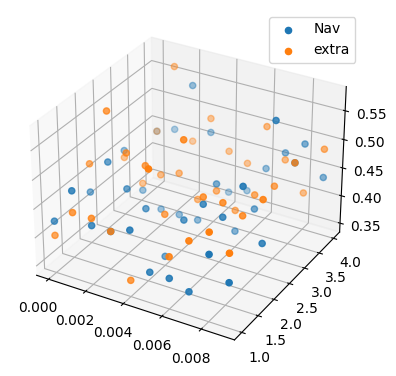

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 9] , label='Nav')
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 15] , label='extra')
plt.legend()
plt.grid()
plt.show()

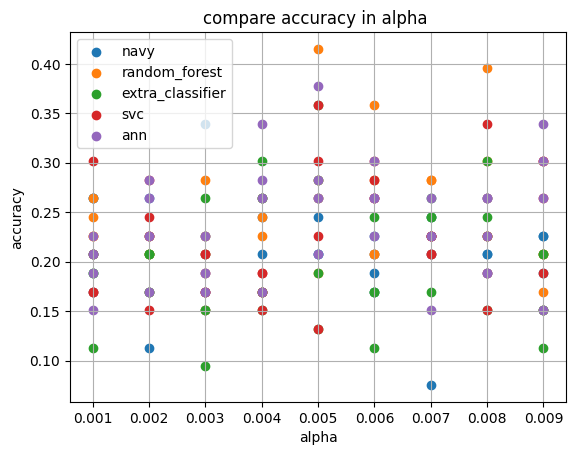

In [16]:
plt.scatter( df_result['alpha'] , df_result['accuracy_nav'] , label = 'navy')
plt.scatter( df_result['alpha'] , df_result['accuracy_random_forest'] , label = 'random_forest')
plt.scatter( df_result['alpha'] , df_result['accuracy_extra_classifier'] , label = 'extra_classifier')
plt.scatter( df_result['alpha'] , df_result['accuracy_svc_'] , label = 'svc')
plt.scatter( df_result['alpha'] , df_result['ann'] , label = 'ann')
plt.title("compare accuracy in alpha ")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

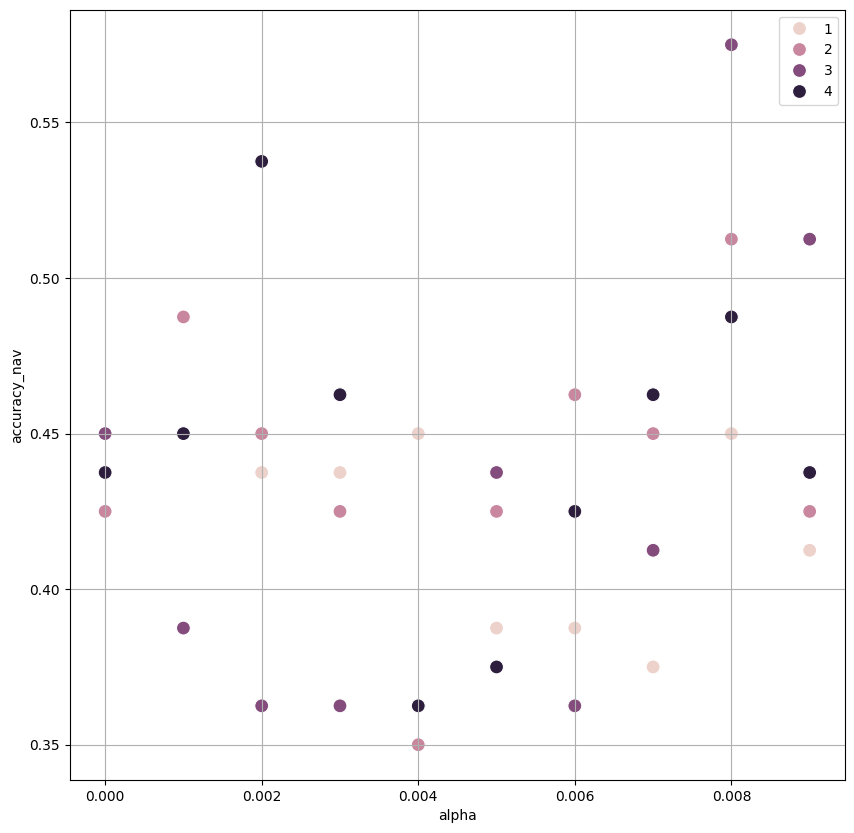

In [ ]:
plt.figure(figsize = (10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="accuracy_nav", hue="flap" , s = 100  )
plt.legend()
plt.grid()
plt.show()

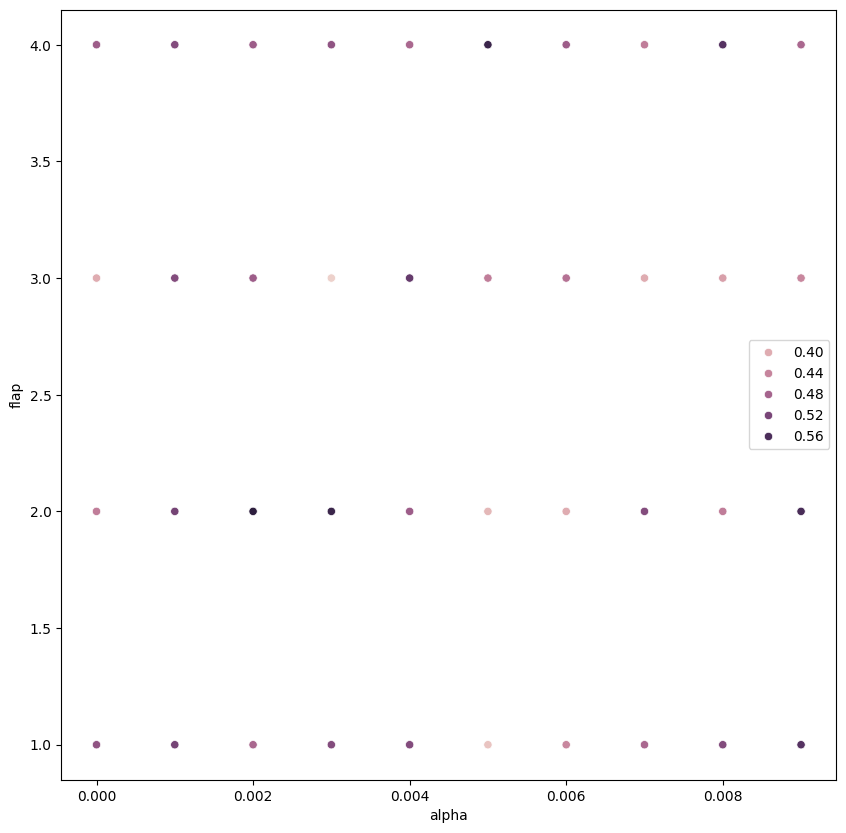

In [ ]:
plt.figure(figsize=(10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="flap", hue="accuracy_svc_", hue_order = ["linear" , "rbf" ] )
plt.legend()
plt.show()

In [ ]:
df_result['flap'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

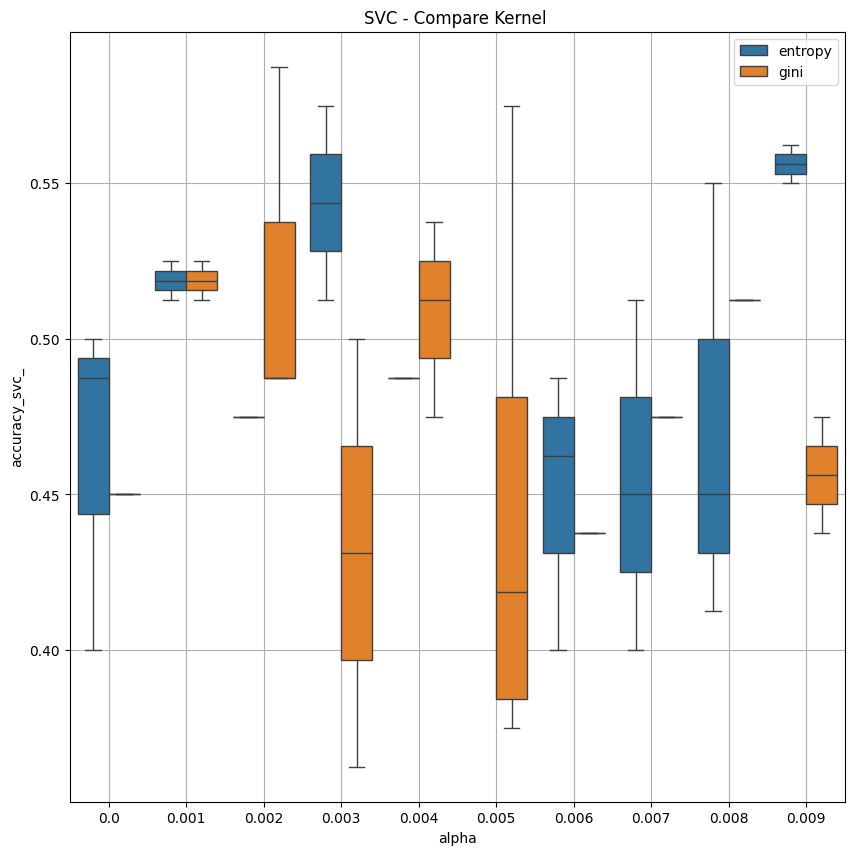

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='criterion_RF', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

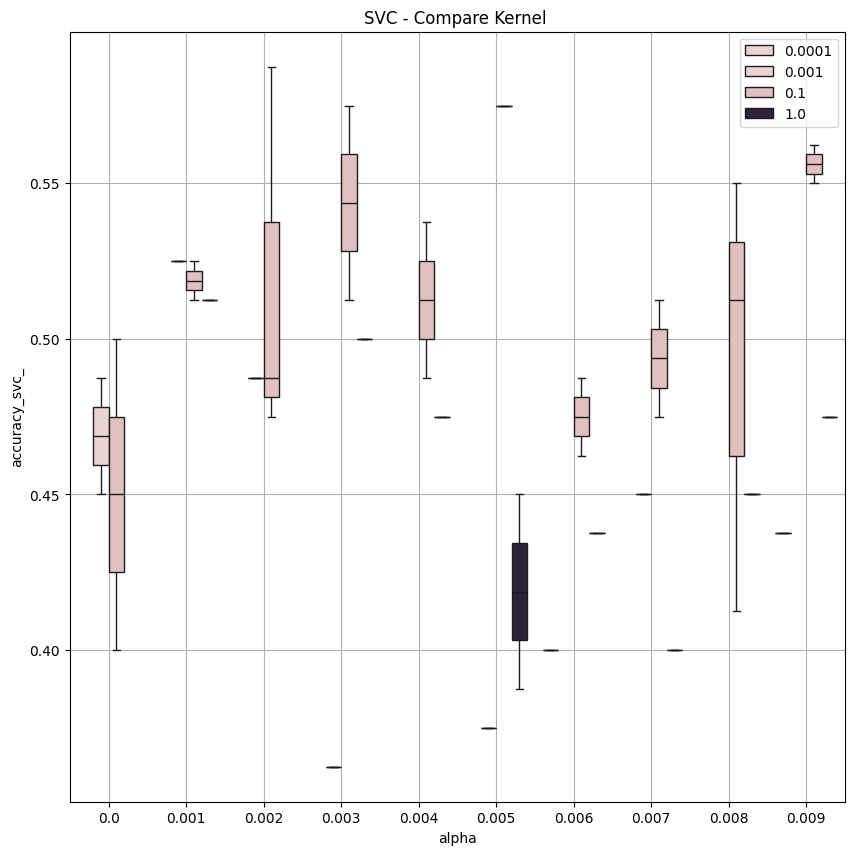

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='gamma_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

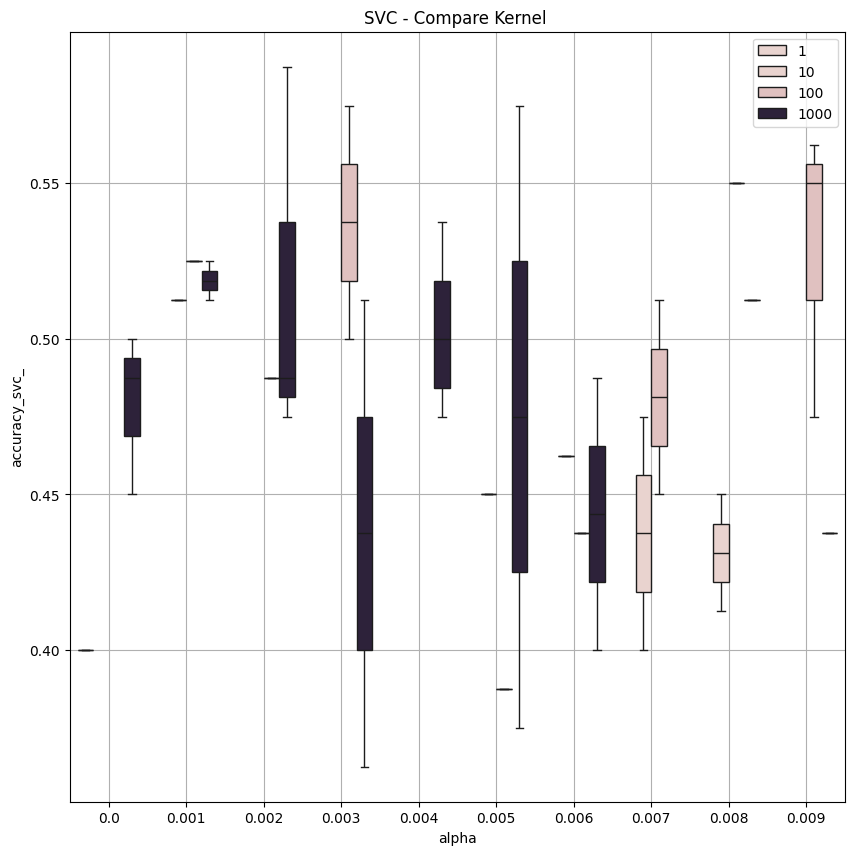

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='C_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


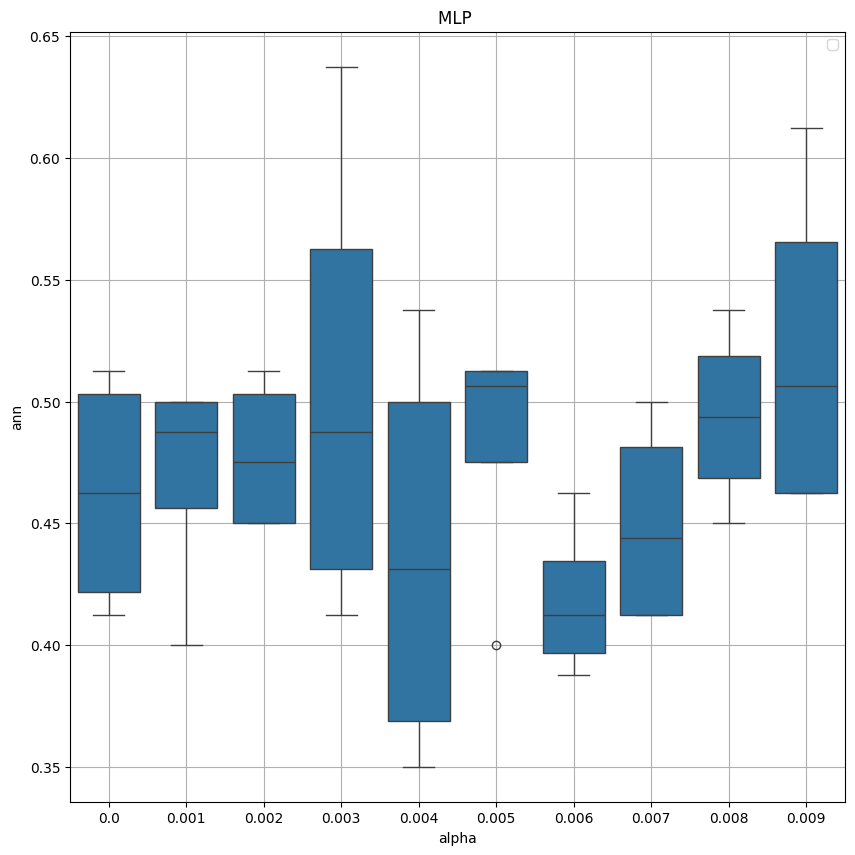

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="ann" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
accuracy_nav

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_nav" , hue="flap" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
